<a href="https://colab.research.google.com/github/yasirfaizahmed/Text-Classification-models/blob/main/data_analysis_imdb0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install datasets
from datasets import load_dataset

ds = load_dataset("stanfordnlp/imdb")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame(ds["train"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [9]:
df["text_length"] = df["text"].apply(lambda sentence: len(sentence.split()))
df

,text,label,text_length
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,288
1,"""I Am Curious: Yellow"" is a risible and preten...",0,214
2,If only to avoid making this type of film in t...,0,93
3,This film was probably inspired by Godard's Ma...,0,118
4,"Oh, brother...after hearing about this ridicul...",0,311
...,...,...,...
24995,A hit at the time but now better categorised a...,1,108
24996,I love this movie like no other. Another time ...,1,183
24997,This film and it's sequel Barry Mckenzie holds...,1,134
24998,'The Adventures Of Barry McKenzie' started lif...,1,717


<Axes: ylabel='Frequency'>

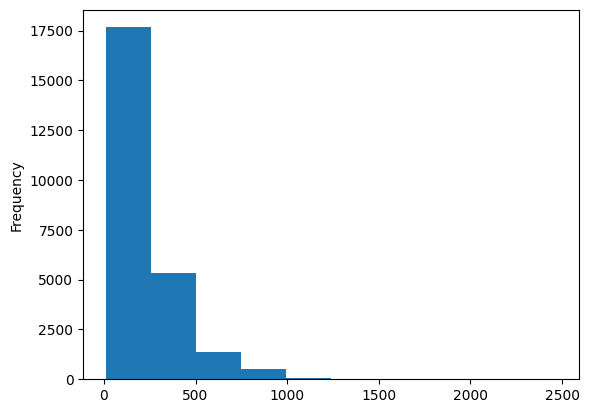

In [18]:
# @title text_length

from matplotlib import pyplot as plt
df['text_length'].plot(kind='hist', title="Word count frequency Histogram Plot")

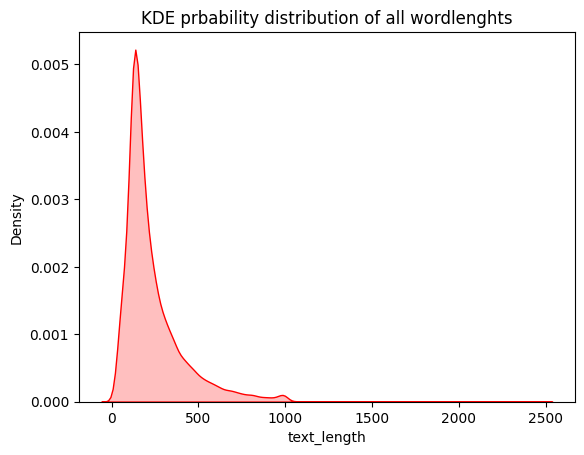

In [44]:
sns.kdeplot(data=df, x='text_length', fill=True, color="red")
plt.title("KDE probability distribution of all wordlenghts")
plt.show()

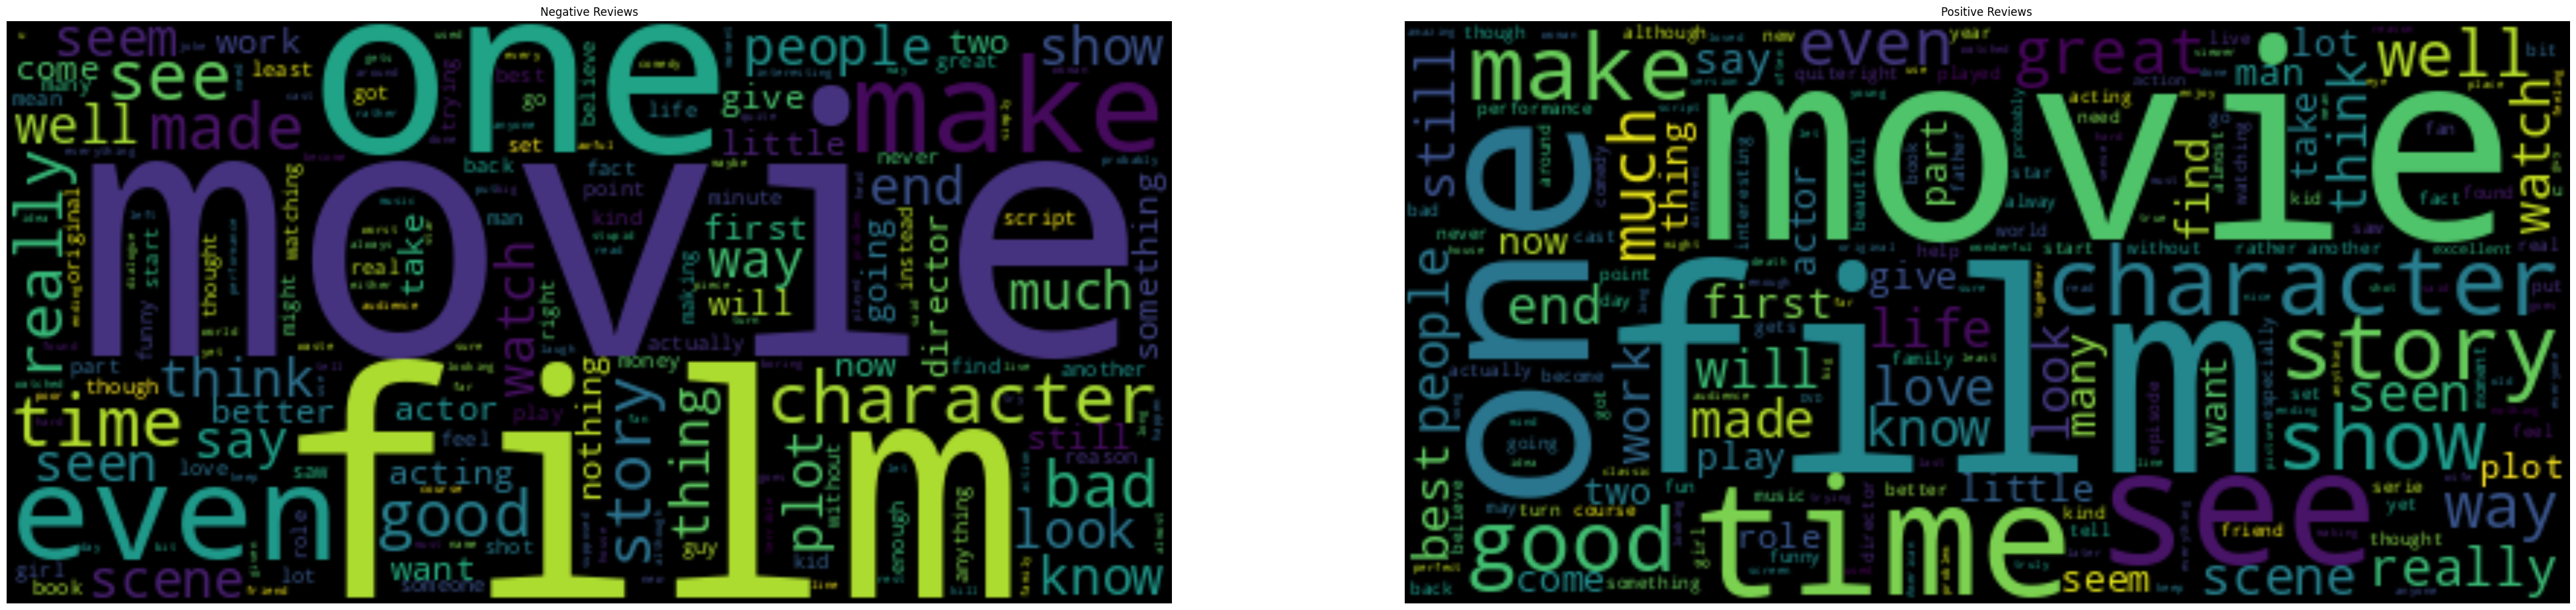

In [62]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["br"])

# generate word clouds for each label
all_negative_text = " ".join(df[df["label"] == 0]["text"])
wordcloud_negative = WordCloud(stopwords=custom_stopwords,
                               background_color="black").generate(all_negative_text)
all_positive_text = " ".join(df[df["label"] == 1]["text"])
wordcloud_positive = WordCloud(stopwords=custom_stopwords,
                               background_color="black").generate(all_positive_text)

plt.figure(figsize=(50, 50))

plt.subplot(1,2,1)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews")

plt.subplot(1,2,2)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews")

plt.show()